# Clastering. Part 2

---
Author: Anatoliy Durkin

Updated: 02.05.2025

---
В ноутбуке рассмотерны методы кластеризации

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
peng = pd.read_csv('penguins.csv')
peng = peng[peng['sex']!='.']
peng = peng[(peng['flipper_length_mm']<1000) & (peng['flipper_length_mm']>100)]
peng = peng.dropna().reset_index(drop=True)
peng = pd.get_dummies(peng, drop_first=True)

peng_norm = pd.DataFrame(StandardScaler().fit_transform(peng), columns=peng.columns).dropna()


cust = pd.read_csv('customer_segmentation.csv')
cust = cust.drop(['ID', 'Dt_Customer'], axis=1)
cust['Education'] = LabelEncoder().fit_transform(cust['Education'])
cust['Marital_Status'] = LabelEncoder().fit_transform(cust['Marital_Status'])

cust_norm = pd.DataFrame(StandardScaler().fit_transform(cust), columns=cust.columns).dropna()
cust_pca = PCA(n_components=2).fit_transform(cust_norm)

In [9]:
peng_norm.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


In [10]:
cust_norm.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.985345,-0.350141,0.251004,0.234063,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,...,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.235733,-0.350141,0.251004,-0.234559,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.317643,-0.350141,1.180340,0.769478,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,...,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,1.268149,-0.350141,1.180340,-1.017239,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,...,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,1.017761,1.428354,-0.678332,0.240221,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,...,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


## Gaussian Mixture Models (GMM)

Когда использовать:

- Кластеры с перекрытием
- Нужны вероятности принадлежности
- Разные размеры/формы кластеров

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [12]:
# Данные с разной дисперсией
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

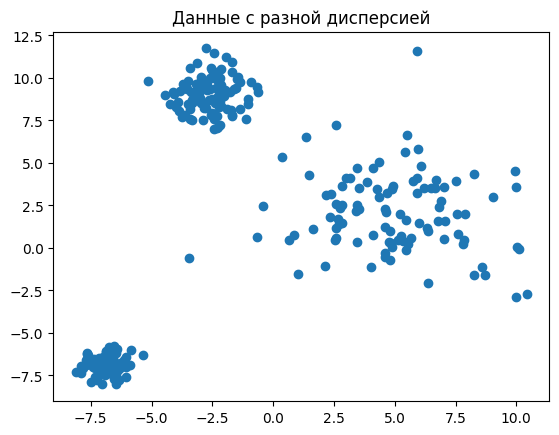

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.title("Данные с разной дисперсией")
plt.show()

In [14]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
clusters = gmm.predict(X)

In [15]:
# Границы кластеров
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

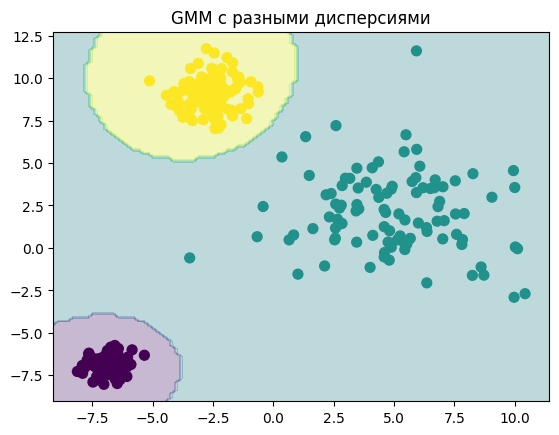

In [16]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50)
plt.title("GMM с разными дисперсиями")
plt.show()

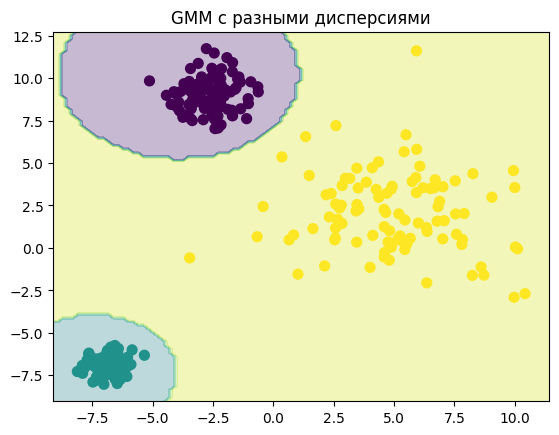

In [17]:
gmm = GaussianMixture(n_components=3, covariance_type='spherical')
gmm.fit(X)
clusters = gmm.predict(X)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50)
plt.title("GMM с разными дисперсиями")
plt.show()

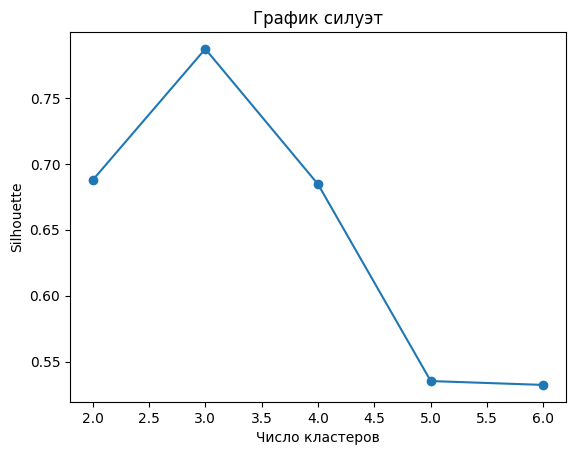

In [18]:
silhouette = []
for k in range(2, 7):
    clusters = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    silhouette.append(silhouette_score(X, clusters))

plt.plot(range(2, 7), silhouette, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette")
plt.title("График силуэт")
plt.show()

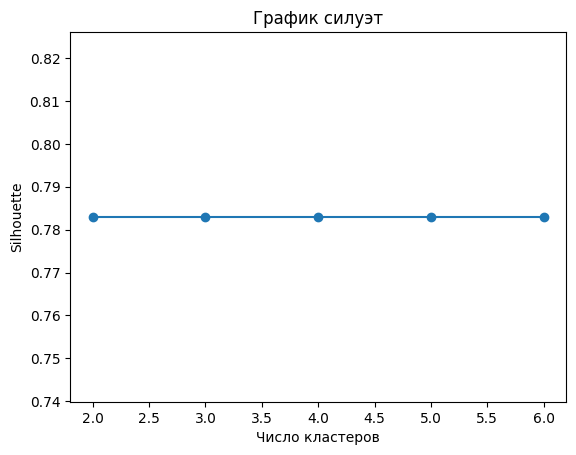

In [19]:
silhouette = []
for k in range(2, 7):
    clusters = GaussianMixture(n_components=3).fit_predict(X)
    silhouette.append(silhouette_score(X, clusters))

plt.plot(range(2, 7), silhouette, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("Silhouette")
plt.title("График силуэт")
plt.show()

Также для выбора количества кластеров можно использовать BIC, но это подходит только для GMM.

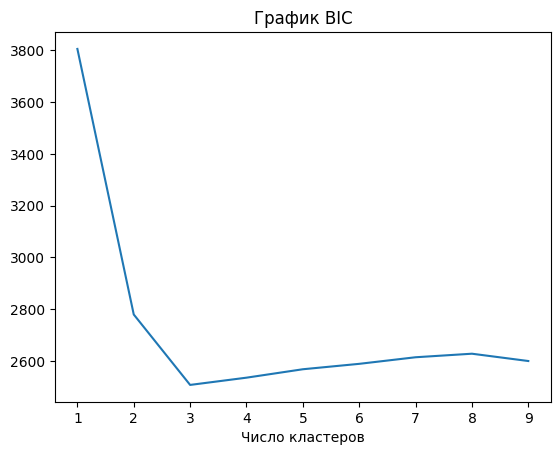

In [20]:
bics = []
for n in range(1, 10):
    gmm = GaussianMixture(n_components=n).fit(X)
    bics.append(gmm.bic(X))
plt.plot(range(1, 10), bics)
plt.xlabel("Число кластеров")
plt.title("График BIC")
plt.show()

Воспользуемся этим методом для наших наборов данных. Также определите, какое число кластеров оптимально по BIC для каждого набора.

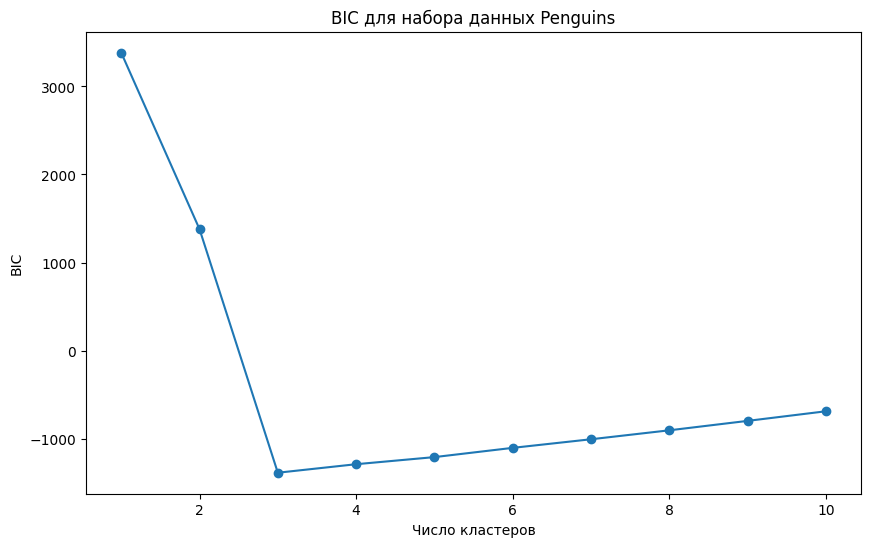

In [46]:
# Для penguins
bics = []
max_clusters = 10
for n in range(1, max_clusters+1):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(peng_norm.drop(['sex_MALE'], axis=1))
    bics.append(gmm.bic(peng_norm.drop(['sex_MALE'], axis=1)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), bics, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("BIC")
plt.title("BIC для набора данных Penguins")
plt.show()


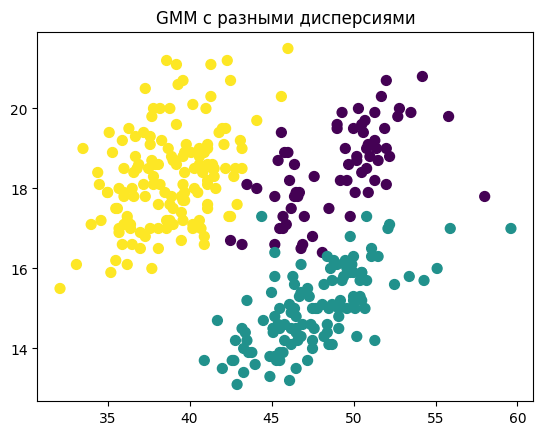

In [22]:
gmm = GaussianMixture(n_components=3)
gmm.fit(peng_norm.drop(['sex_MALE'], axis=1))
clusters = gmm.predict(peng_norm.drop(['sex_MALE'], axis=1))

plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters, s=50)
plt.title("GMM с разными дисперсиями")
plt.show()

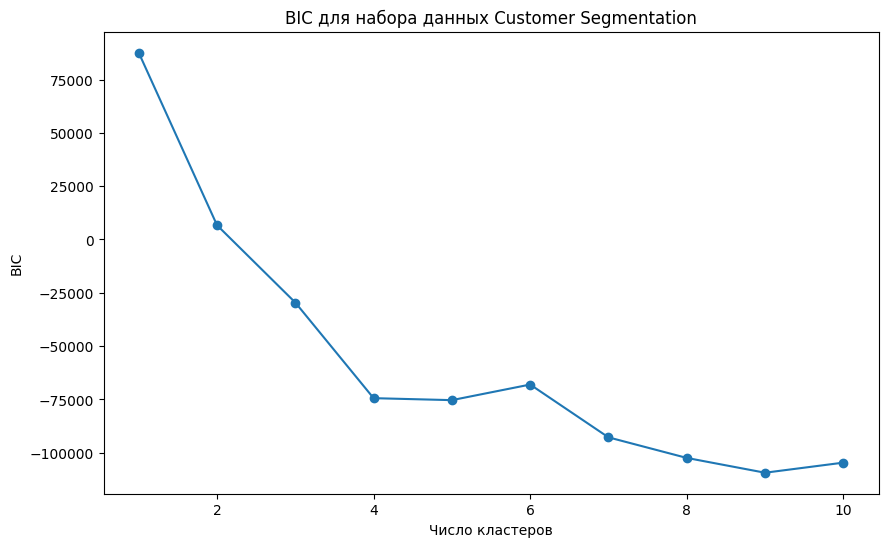

In [47]:
# Для customer segmentation
bics = []
max_clusters = 10
for n in range(1, max_clusters+1):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(cust_norm)
    bics.append(gmm.bic(cust_norm))

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters+1), bics, marker='o')
plt.xlabel("Число кластеров")
plt.ylabel("BIC")
plt.title("BIC для набора данных Customer Segmentation")
plt.show()

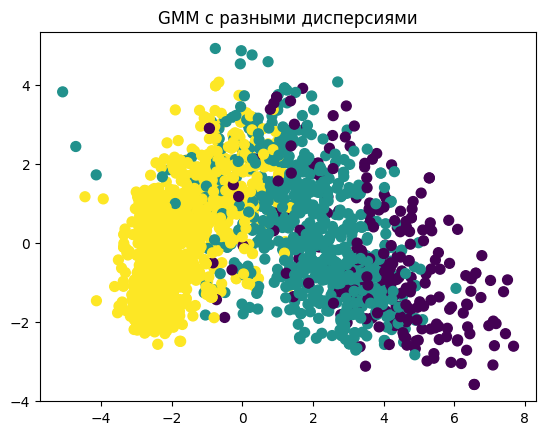

In [24]:
gmm = GaussianMixture(n_components=3)
gmm.fit(cust_norm)
clusters = gmm.predict(cust_norm)

plt.scatter(cust_pca[:, 0], cust_pca[:, 1], c=clusters, s=50)
plt.title("GMM с разными дисперсиями")
plt.show()

## Spectral Clustering

Когда использовать:

- Кластеры сложной формы (полумесяцы, кольца)
- Когда DBSCAN не справляется

In [25]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

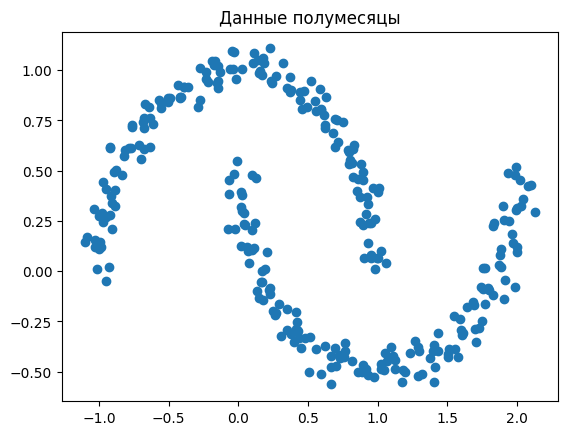

In [26]:
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

plt.scatter(X[:,0], X[:,1])
plt.title("Данные полумесяцы")
plt.show()

In [27]:
spec = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
clusters = spec.fit_predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


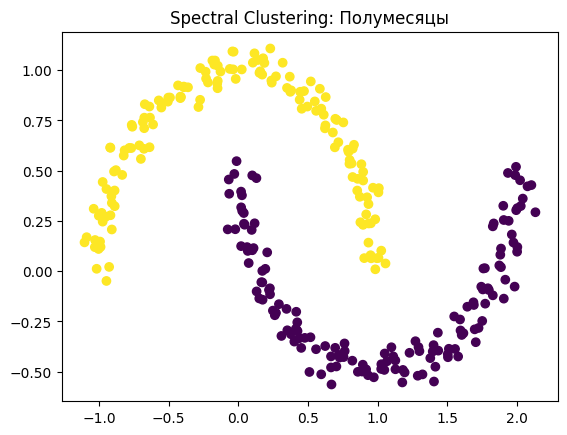

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title("Spectral Clustering: Полумесяцы")
plt.show()

Сравнение работы двух методов

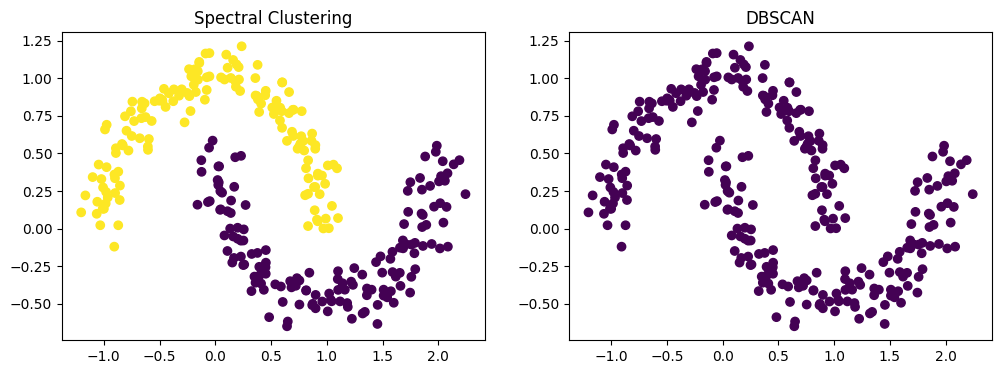

In [29]:
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.09, random_state=42)

spec = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
clusters = spec.fit_predict(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters_db = dbscan.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
ax1.set_title("Spectral Clustering")
ax2.scatter(X[:, 0], X[:, 1], c=clusters_db, cmap='viridis')
ax2.set_title("DBSCAN")
plt.show()

Что получится сделать с нашими датасетами?

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


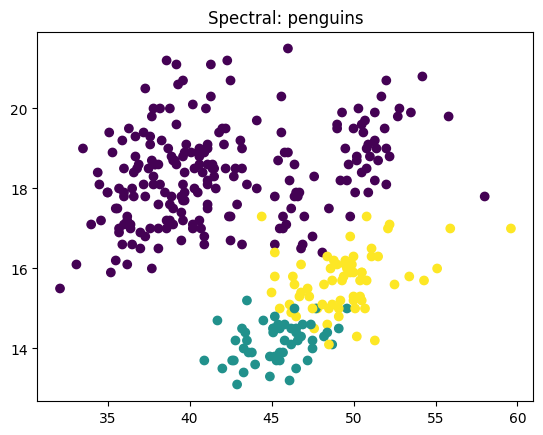

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


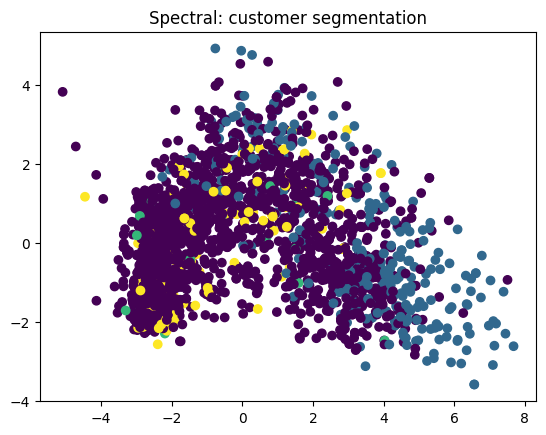

In [48]:
from sklearn.cluster import SpectralClustering

# Для penguins
spec = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
clusters = spec.fit_predict(peng_norm.drop(['sex_MALE'], axis=1))
plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters, cmap='viridis')
plt.title("Spectral: penguins")
plt.show()

# Для customer segmentation
spec = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
clusters = spec.fit_predict(cust_norm)
plt.scatter(cust_pca[:, 0], cust_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Spectral: customer segmentation")
plt.show()

## OPTICS (расширенный DBSCAN)

Когда использовать:

- Кластеры разной плотности
- Автоматический подбор параметров

Отличие от DBSCAN:

- Не требует точного задания eps
- Строит reachability-plot

Как работает алгоритм
- Строит «упорядоченный» список точек, где близкие в списке точки геометрически близки в данных.
- Для каждой точки вычисляет «достижимое расстояние» — минимальный радиус, включающий min_samples соседей.
- Кластеры — это «впадины» на графике достижимости (reachability plot).

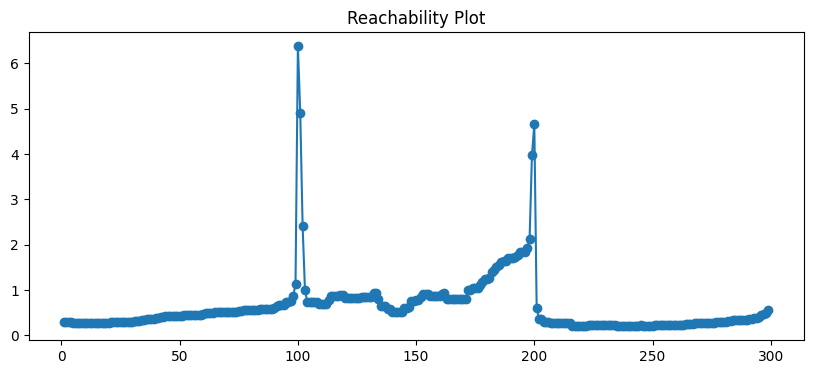

In [31]:
from sklearn.cluster import OPTICS
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 2.0, 0.8], random_state=42)

clust = OPTICS(min_samples=10, xi=0.05)
clust.fit(X)

# Reachability plot
plt.figure(figsize=(10, 4))
plt.plot(clust.reachability_[clust.ordering_], 'o-')
plt.title("Reachability Plot")
plt.show()

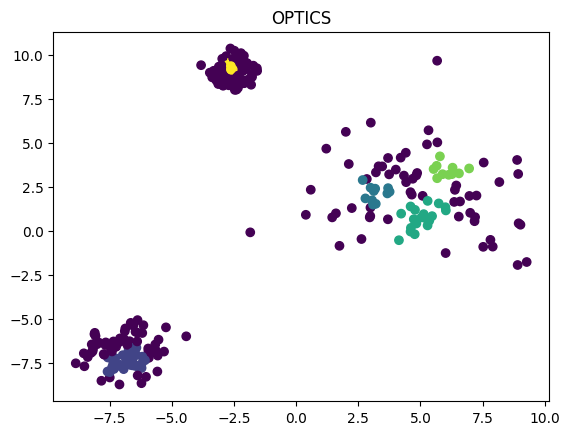

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=clust.labels_, cmap='viridis')
plt.title("OPTICS")
plt.show()

И вновь обратимся к нашим датасетам.

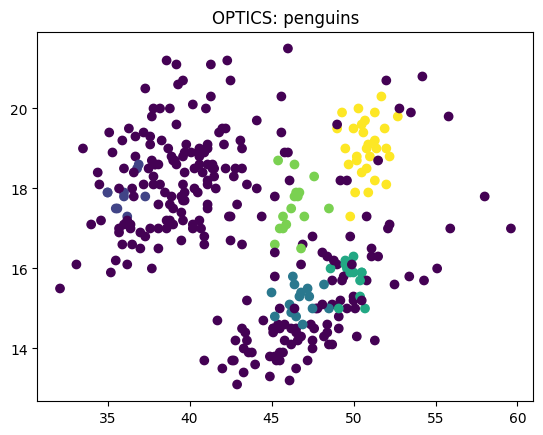

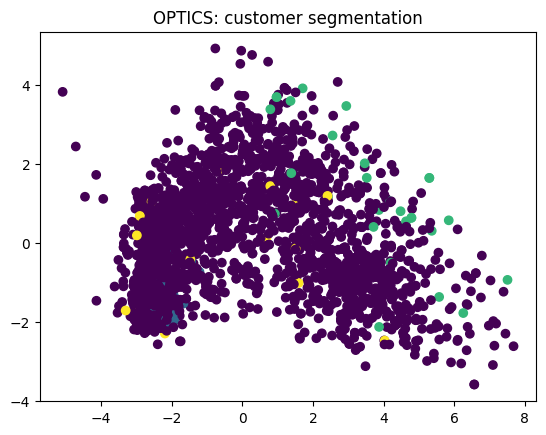

In [49]:
from sklearn.cluster import OPTICS

# Для penguins
optics = OPTICS(min_samples=10, xi=0.05)
clusters = optics.fit_predict(peng_norm.drop(['sex_MALE'], axis=1))
plt.scatter(peng['culmen_length_mm'], peng['culmen_depth_mm'], c=clusters, cmap='viridis')
plt.title("OPTICS: penguins")
plt.show()

# Для customer segmentation
optics = OPTICS(min_samples=15, xi=0.05)
clusters = optics.fit_predict(cust_norm)
plt.scatter(cust_pca[:, 0], cust_pca[:, 1], c=clusters, cmap='viridis')
plt.title("OPTICS: customer segmentation")
plt.show()

## Выбор метода кластеризации

https://scikit-learn.ru/stable/modules/clustering.html

## Интерпретация кластеров

Кластеризация — это не конец анализа, а начало. Найдя группы, мы должны понять:

- Что их объединяет? (Какие признаки значимы)
- Как их можно назвать? (Смысловая интерпретация)
- Как использовать это в бизнесе/науке?

### Анализ центроидов (для K-Means, GMM)

Как работает:

- Центроид — это усреднённая точка кластера в пространстве признаков.
- Сравниваем значения признаков центроидов между кластерами.

In [34]:
gmm = GaussianMixture(n_components=3)
gmm.fit(peng_norm.drop(['sex_MALE'], axis=1))
clusters = gmm.predict(peng_norm.drop(['sex_MALE'], axis=1))

peng['Кластер'] = clusters

# Средние значения по кластерам
peng.groupby('Кластер').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
Кластер,,,,,
0,47.568067,14.996639,217.235294,5092.436975,0.512605
1,48.930882,18.464706,196.397059,3752.941176,0.529412
2,38.807586,18.307586,189.779310,3692.068966,0.482759


Выберите метод кластеризации для второго набора данных и проанализируйте центроиды.

<ipython-input-60-4176703173>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_val = float(f_val)
<ipython-input-60-4176703173>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p_val = float(p_val)
<ipython-input-60-4176703173>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_val = float(f_val)
<ipython-input-60-4176703173>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a s

Year_Birth: F=25.28, p=0.0000
Education: F=4.37, p=0.0045
Income: F=519.87, p=0.0000
Kidhome: F=373.01, p=0.0000
Teenhome: F=30.35, p=0.0000
MntWines: F=955.92, p=0.0000
MntFruits: F=238.77, p=0.0000
MntMeatProducts: F=432.58, p=0.0000
MntFishProducts: F=256.33, p=0.0000
MntSweetProducts: F=244.16, p=0.0000
MntGoldProds: F=261.52, p=0.0000
NumDealsPurchases: F=51.58, p=0.0000
NumWebPurchases: F=509.84, p=0.0000
NumCatalogPurchases: F=602.18, p=0.0000
NumStorePurchases: F=744.54, p=0.0000
NumWebVisitsMonth: F=165.37, p=0.0000
AcceptedCmp3: F=158.72, p=0.0000
AcceptedCmp4: F=183.85, p=0.0000
AcceptedCmp5: F=4374.73, p=0.0000
AcceptedCmp1: F=457.07, p=0.0000
AcceptedCmp2: F=129.00, p=0.0000
Complain: F=99.49, p=0.0000
Response: F=113.44, p=0.0000


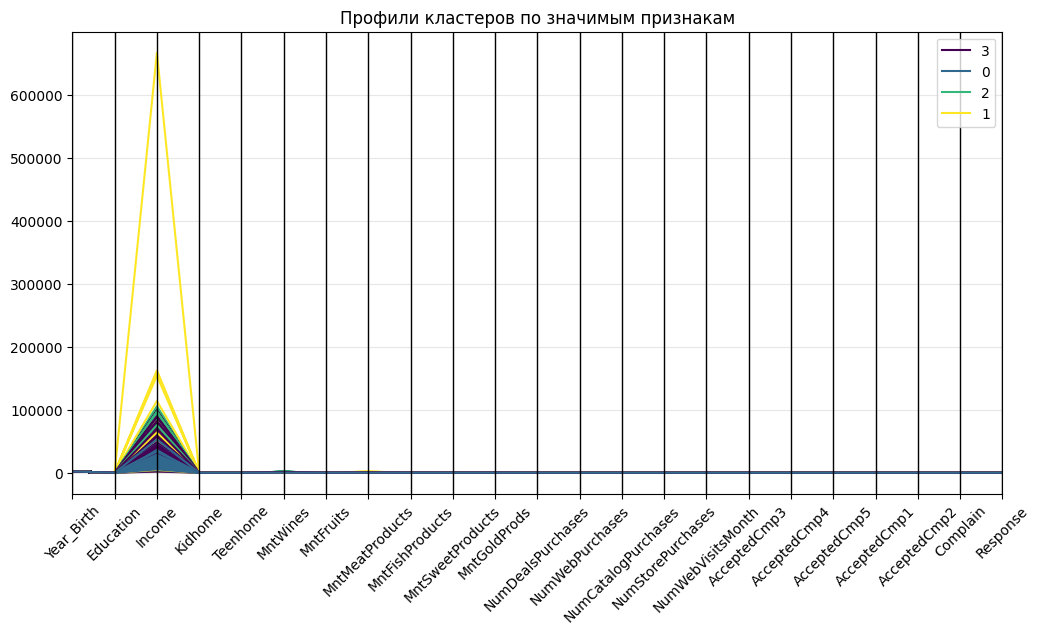

In [60]:
# Теперь можно выполнять анализ
significant_features = []
for column in cust_filtered.columns:
    if column == 'Cluster':
        continue

    # Создаем список значений для каждого кластера
    cluster_groups = []
    for cluster_label in cust_filtered['Cluster'].unique():
        cluster_data = cust_filtered[cust_filtered['Cluster'] == cluster_label][column]
        cluster_groups.append(cluster_data)

    # Проводим ANOVA
    f_val, p_val = f_oneway(*cluster_groups)

    # Преобразуем результаты в float
    f_val = float(f_val)
    p_val = float(p_val)

    if p_val < 0.05:
        significant_features.append(column)
        print(f"{column}: F={f_val:.2f}, p={p_val:.4f}")

# Визуализация параллельных координат
if significant_features:
    # Выбираем только значимые признаки и столбец кластеров
    plot_data = cust_filtered[significant_features + ['Cluster']]

    # Создаем график
    plt.figure(figsize=(12, 6))
    pd.plotting.parallel_coordinates(plot_data, 'Cluster', colormap='viridis')
    plt.title("Профили кластеров по значимым признакам")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("Нет статистически значимых признаков между кластерами")

Важность признаков.

ANOVA — определяет, какие признаки значимо различаются между кластерами. Возвращает значение F-статистики.

In [36]:
from sklearn.feature_selection import f_oneway

In [37]:
f_values, p_values = f_oneway(peng[clusters==0], peng[clusters==1], peng[clusters==2])
print(f_values)
print(p_values)

[4.21394560e+02 3.47952221e+02 5.93773452e+02 3.45206423e+02
 2.33856119e-01            inf]
[1.79055986e-091 6.62689283e-082 6.72881218e-110 1.60373790e-081
 7.91607137e-001 0.00000000e+000]


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


SHAP для кластеризации — показывает вклад каждого признака в кластер.

In [38]:
import shap

In [39]:
gmm = GaussianMixture(n_components=3).fit(peng_norm.drop(['sex_MALE'], axis=1))
explainer = shap.KernelExplainer(gmm.predict, peng_norm.drop(['sex_MALE'], axis=1))
shap_values = explainer.shap_values(peng_norm.drop(['sex_MALE'], axis=1))
shap_values

  0%|          | 0/332 [00:00<?, ?it/s]

array([[-0.30522088,  0.20783133,  0.1686747 ,  0.08534137],
       [-0.32329317,  0.16616466,  0.18022088,  0.13353414],
       [-0.36094378,  0.24196787,  0.08835341,  0.187249  ],
       ...,
       [ 0.13353414, -0.30923695, -0.28413655, -0.38353414],
       [ 0.08985944, -0.47991968, -0.18825301, -0.26506024],
       [ 0.19277108, -0.31124498, -0.18975904, -0.53514056]])

### Визуализация

Parallel Coordinates — это как "профиль" каждого кластера. Линии, которые идут отдельно от других, — это ключевые различия.

<Axes: >

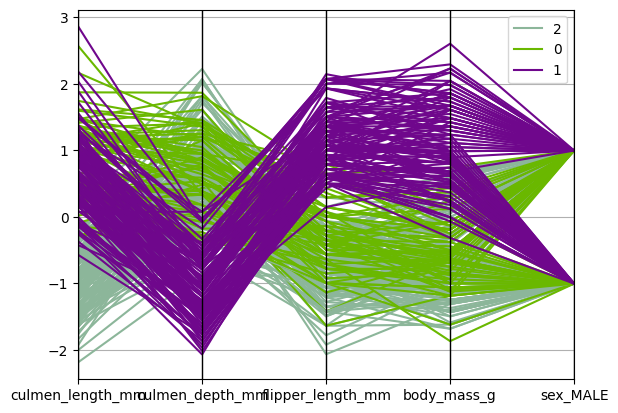

In [40]:
gmm = GaussianMixture(n_components=3)
gmm.fit(peng_norm.drop(['sex_MALE'], axis=1))
clusters = gmm.predict(peng_norm.drop(['sex_MALE'], axis=1))

peng_norm['Кластер'] = clusters
pd.plotting.parallel_coordinates(peng_norm, 'Кластер')